In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

C:\Users\admin\Documents\ds4a


## Principal Libreries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import os
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm

In [3]:
from core.data_preparation.data_preparation import apply_data_preparation

## Read data

In [4]:
df_core = apply_data_preparation(saving=False)
df_core.rename(columns={'Halo-Acetic Acid_value':'Halo_Acetic_Acid_value'}, inplace=True)

## Graphs for every Chemical Agent

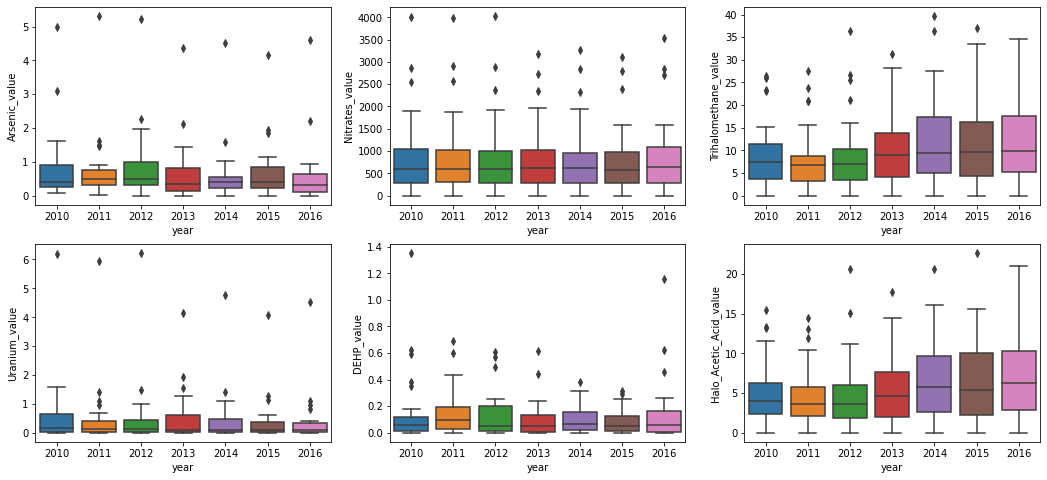

In [5]:
fig, ax=plt.subplots(2,3, figsize=(18,8))

name_chemical = ['Arsenic_value', 'Nitrates_value', 'Trihalomethane_value',
                 'Uranium_value', 'DEHP_value', 'Halo_Acetic_Acid_value']
position = [[i,j] for i in range(2) for j in range(3)]

for name, position in zip(name_chemical, position):
    sns.boxplot(x=df_core['year'], y=df_core[name], ax=eval(f'ax{position}'))

## Graphs for every Earning Sector

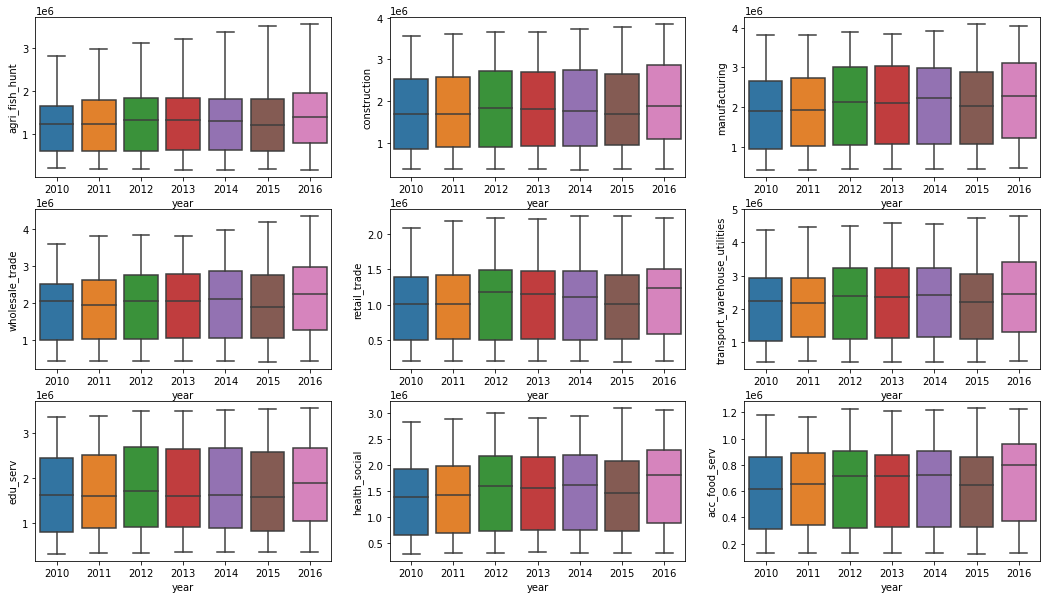

In [6]:
fig, ax=plt.subplots(3,3, figsize=(18,10))

name_chemical = ['agri_fish_hunt', 'construction', 'manufacturing',
                 'wholesale_trade', 'retail_trade', 'transport_warehouse_utilities',
                 'edu_serv', 'health_social', 'acc_food_serv']
position = [[i,j] for i in range(3) for j in range(3)]

for name, position in zip(name_chemical, position):
    sns.boxplot(x=df_core['year'], y=df_core[name], ax=eval(f'ax{position}'))

In [7]:
ttest_ind(df_core['Arsenic_value'], df_core['manufacturing'])

Ttest_indResult(statistic=-24.31415401277481, pvalue=5.934048967080354e-78)

Arsenic concentration and manufacturing revenues are inversely related and the relationsihip is significant.

## Behavior for earnings sector every year

<AxesSubplot:xlabel='year'>

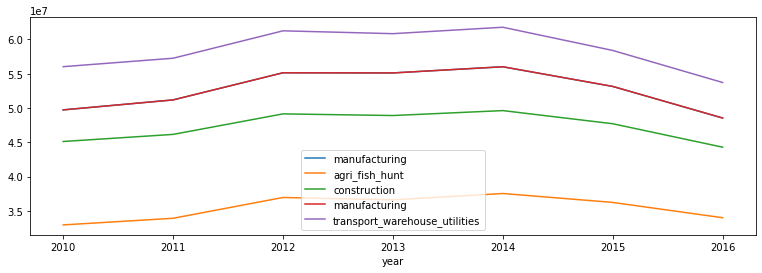

In [8]:
df_core[['year', 'manufacturing', 'agri_fish_hunt', 'construction',
         'manufacturing', 'transport_warehouse_utilities']].groupby(
    'year').sum().plot(figsize=(13, 4))

## Behavior for chemical agent every year

<AxesSubplot:xlabel='year'>

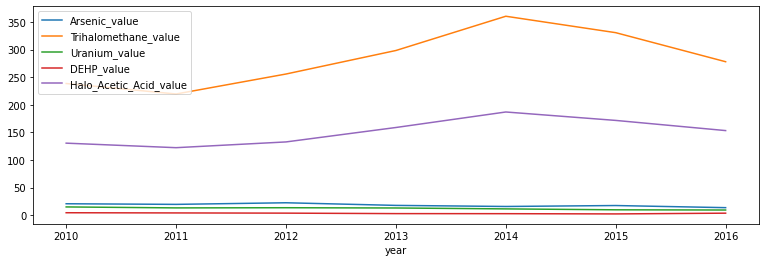

In [9]:
df_core[['year','manufacturing', 'Arsenic_value', 'Nitrates_value','Trihalomethane_value',
         'Uranium_value', 'DEHP_value', 'Halo_Acetic_Acid_value']].groupby(
    'year').sum().drop(columns=['manufacturing', 'Nitrates_value']).plot(figsize=(13, 4))

## CORRELATION MATRIX

In [10]:
corr_mat = df_core[
    ['agri_fish_hunt', 'construction', 'manufacturing', 'wholesale_trade',
     'retail_trade', 'transport_warehouse_utilities', 'transport_warehouse',
     'edu_serv', 'health_social', 'acc_food_serv', 'other_ser', 'pub_admin',
     'Arsenic_value', 'Nitrates_value','Trihalomethane_value', 'Uranium_value',
     'DEHP_value', 'Halo_Acetic_Acid_value']].corr()

Text(0.5, 1.0, 'Correlation Matrix')

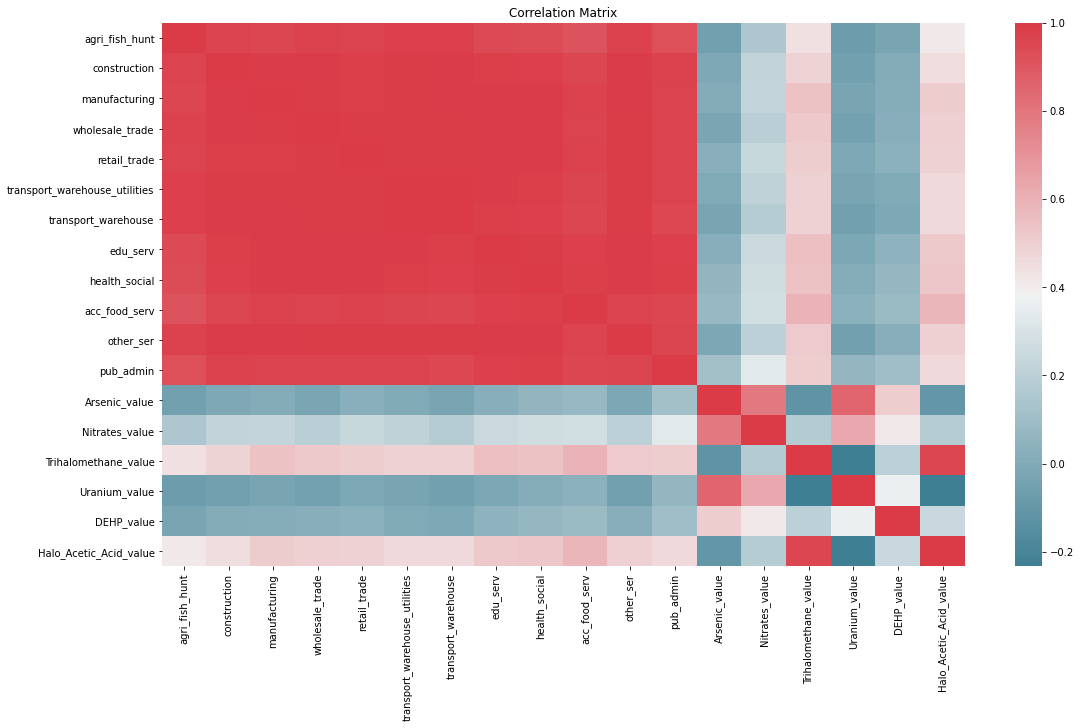

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

# plt.savefig('sectors.png', bbox_inches='tight', dpi=300)